- Kareem Mohamed Fouad

# Importing important libraries

In [427]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Reading dataset and understanding features

In [428]:
dataset = pd.read_csv('census.csv', index_col=False)
dataset.info()
print("Data shape= ", dataset.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
Data shape=  (48842, 15)


In [429]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [430]:
dataset.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [431]:
print(dataset.isna().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [432]:
# Handling Categorical data values
list = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for i in list:
    print(i,"values: ",dataset[i].unique())
    print(i,"Category number= ", dataset[i].unique().size ,"\n")

workclass values:  ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
workclass Category number=  9 

education values:  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
education Category number=  16 

marital-status values:  ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
marital-status Category number=  7 

occupation values:  ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
occupation Category number=  15 

relationship values:  ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
relationship Category number=  6 

ra

In [433]:
# Digitizing the income column 
dataset['income']=dataset['income'].map({'<=50K':0, '>50K':1}) #less than 50k is 0 more than 50k is 1

# Data Visualization

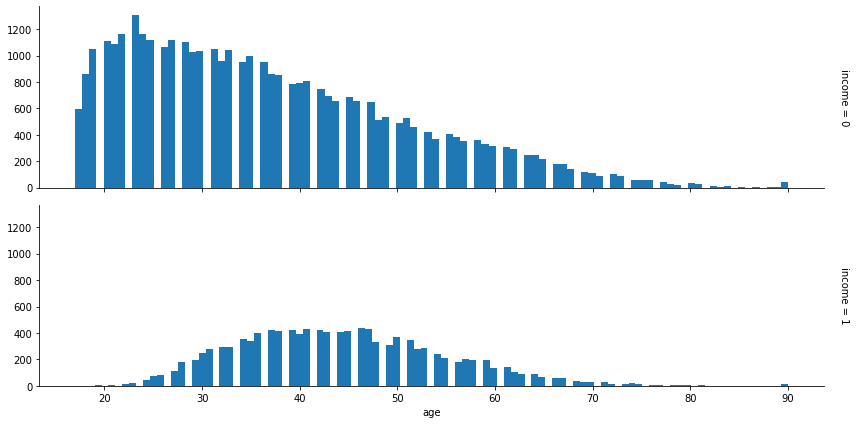

In [434]:
g = sns.FacetGrid(dataset, row="income", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'age',bins=100)
plt.show()

It appears that income above 50k have *normal distribution*,
In the other hand low ages shows higher results for income not above 50k

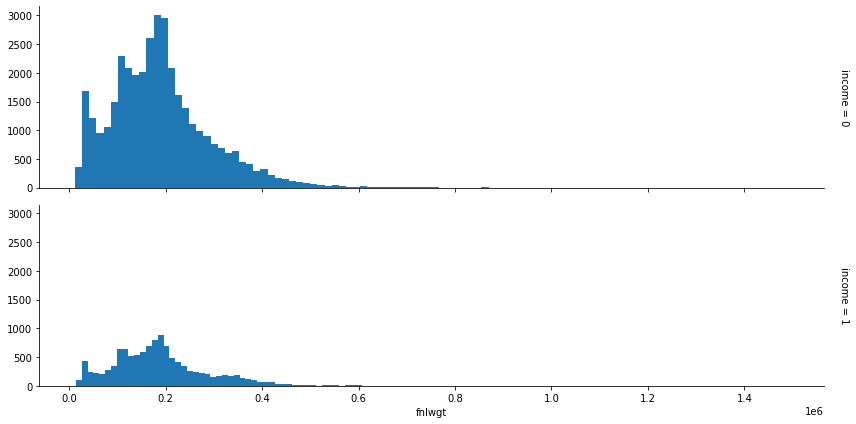

In [435]:
g = sns.FacetGrid(dataset, row="income", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'fnlwgt',bins=100)
plt.show()

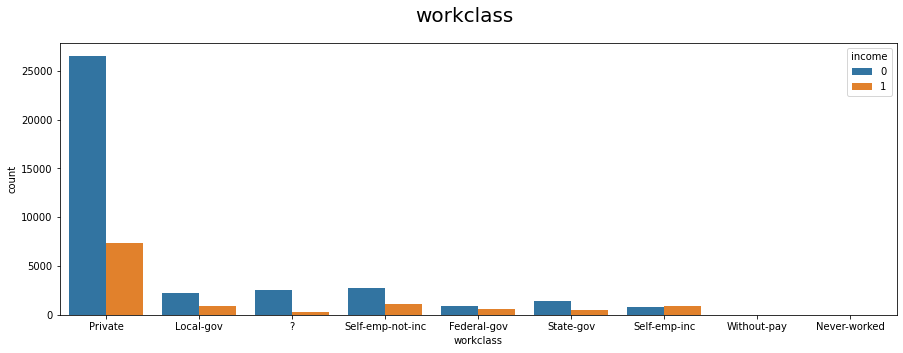

In [436]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='workclass', hue='income', data = dataset)

plt.suptitle('workclass',fontsize=20)
plt.show()

Private contains most of the records we can cut the categories to private and other, also remove '?' 

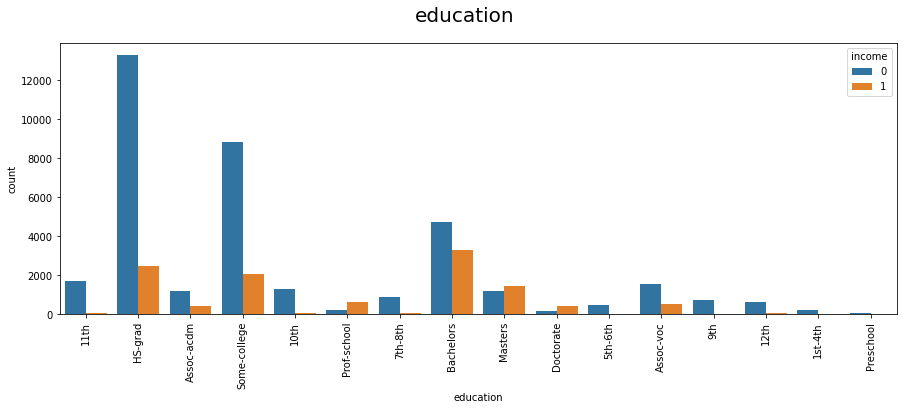

In [437]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='education', hue='income', data = dataset)
plt.xticks(rotation=90)
plt.suptitle('education',fontsize=20)
plt.show()

Cutting categories here aswell. Grouping categories with similar levels of education together.
- Preschool , 1st-4th , 5th-6th , 7th-8th , 9th , 10th , 11th , 12th , HS-grad as 'hs-or-under'
- Prof-school , Assoc-acdm , Assoc-voc , Some-college as 'acdm-edu'
- Bachelors , Masters , Doctorate as 'acdmgrad-or-above'

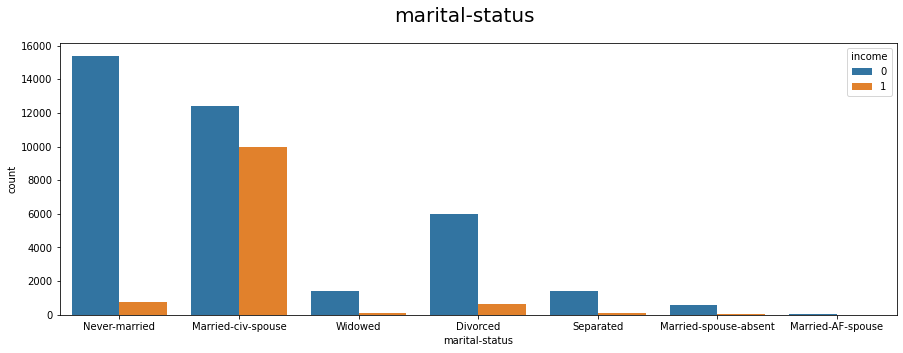

In [438]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='marital-status', hue='income', data = dataset)
plt.suptitle('marital-status',fontsize=20)
plt.show()

- Grouping Divorced and Separated into 'divorced'. 
- Grouping Married-civ-spouse and Married-AF-spouse into 'couple'. 
- Finally grouping Widowed and Married-spouse-absent into 'spouse-missing'.

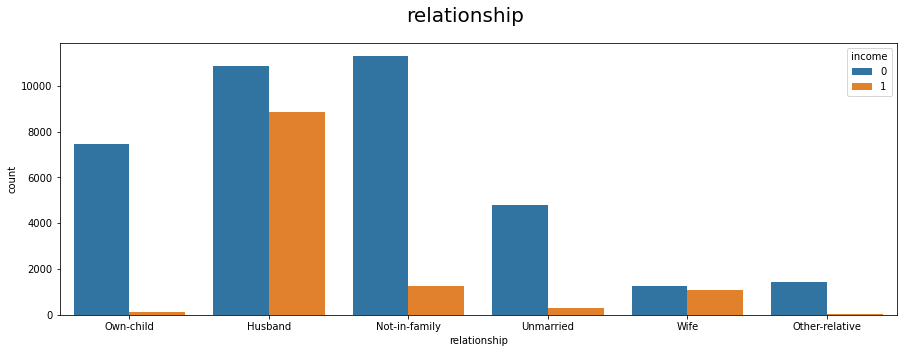

In [439]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='relationship', hue='income', data = dataset)
plt.suptitle('relationship',fontsize=20)
plt.show()

`Unclear`

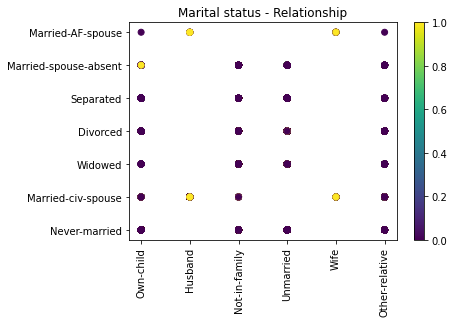

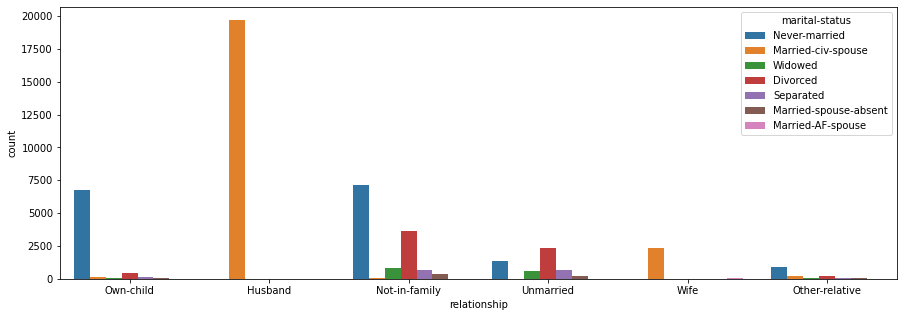

In [440]:
plt.scatter(dataset['relationship'], dataset['marital-status'], c=dataset['income']) 
plt.title("Marital status - Relationship")
plt.xticks(rotation = 90)
plt.colorbar()
plt.show()

f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(data=dataset,x='relationship',hue='marital-status')
plt.show()

This show that the columns relationship and marital-status are represents the same information, thus neglecting relationship column.

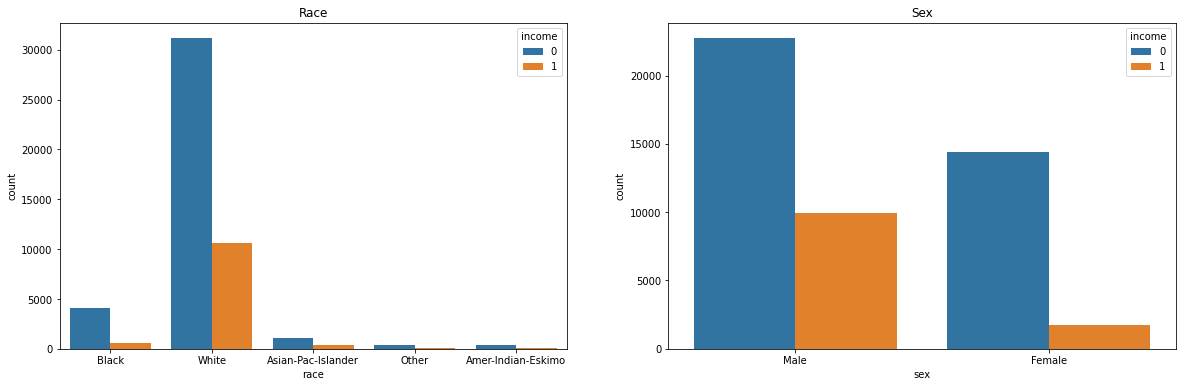

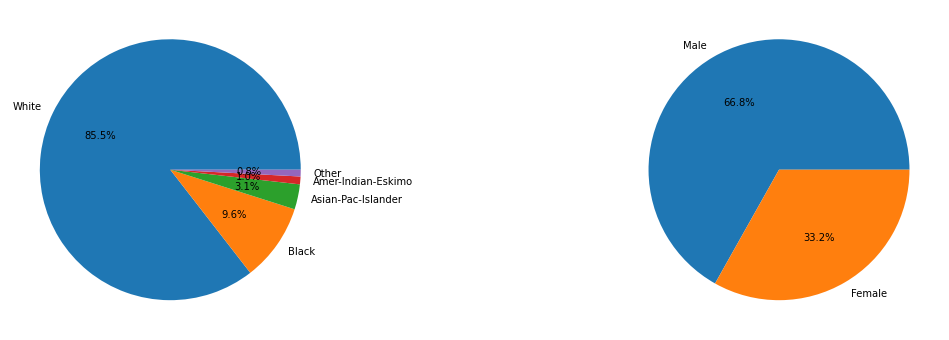

In [441]:
fig = plt.figure(figsize=(20,6))
fig.add_subplot(1,2,1)
sns.countplot(x='race', hue='income', data = dataset)
plt.title("Race")

fig.add_subplot(1,2,2)
sns.countplot(x='sex', hue='income', data = dataset)
plt.title("Sex")

fig1 = plt.figure(figsize=(20,6))
fig1.add_subplot(1,2,1)
plt.pie(dataset['race'].value_counts(),labels=dataset['race'].value_counts().index, autopct='%1.1f%%')
fig1.set_facecolor('white')
fig1.add_subplot(1,2,2)
plt.pie(dataset['sex'].value_counts(),labels=dataset['sex'].value_counts().index, autopct='%1.1f%%');

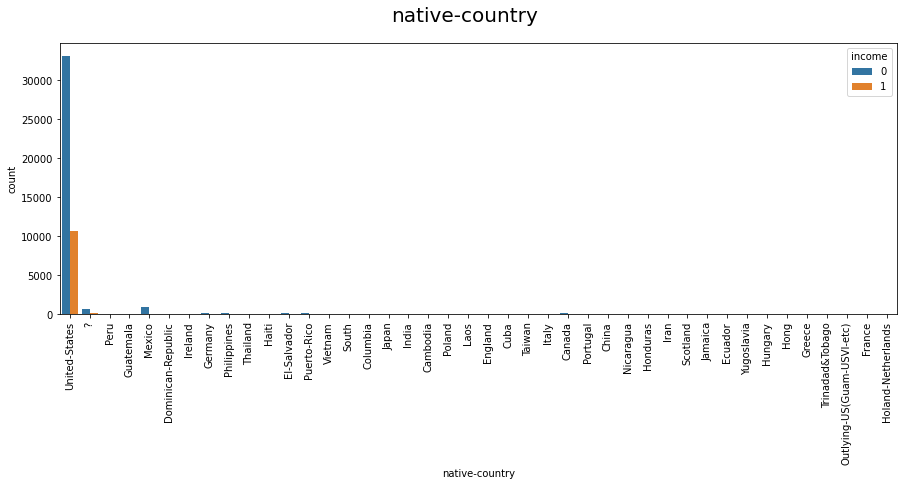

In [442]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='native-country', hue='income', data = dataset)
plt.suptitle('native-country',fontsize=20)
plt.xticks(rotation = 90)
plt.show()

Category cutting on native-country and race

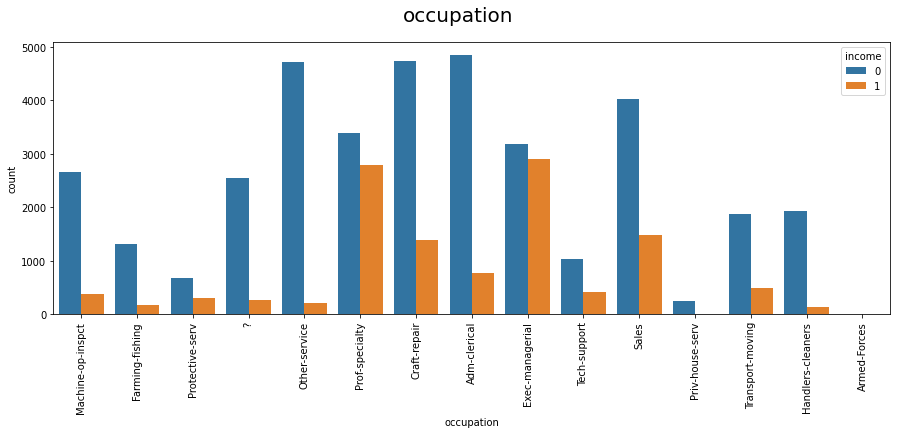

In [443]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='occupation', hue='income', data = dataset)
plt.suptitle('occupation',fontsize=20)
plt.xticks(rotation = 90)
plt.show()

This column is fairly distributed but has a lot of categories

In [444]:
over_50k_count_by_occ=pd.DataFrame(dataset[dataset['income']==1]['occupation'].value_counts())
count_by_occ=pd.DataFrame(dataset['occupation'].value_counts())
merged=pd.merge(over_50k_count_by_occ,count_by_occ,left_index=True,right_index=True)
merged.rename(columns={'occupation_x':'income_over_50K','occupation_y':'Total'}, inplace=True)
merged['percent_of_above_50K']=merged['income_over_50K']/(merged['Total'])
merged=merged.sort_values(by='percent_of_above_50K',axis=0,ascending=False)
merged

,income_over_50K,Total,percent_of_above_50K
Exec-managerial,2908,6086,0.477818
Prof-specialty,2784,6172,0.451069
Armed-Forces,5,15,0.333333
Protective-serv,308,983,0.313327
Tech-support,420,1446,0.290456
Sales,1475,5504,0.267987
Craft-repair,1383,6112,0.226276
Transport-moving,481,2355,0.204246
Adm-clerical,768,5611,0.136874
Machine-op-inspct,372,3022,0.123097


Category grouping by the percentage of above 50k income 
- Group 1 for 0.3 or more
- Group 2 for between 0.2 and 0.3
- Group 3 for less than 0.2

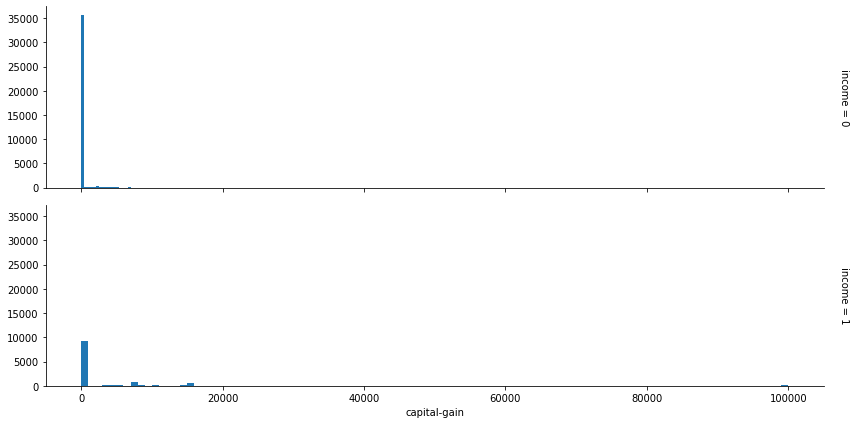

In [445]:
g = sns.FacetGrid(dataset, row="income", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'capital-gain',bins=100)
plt.show()

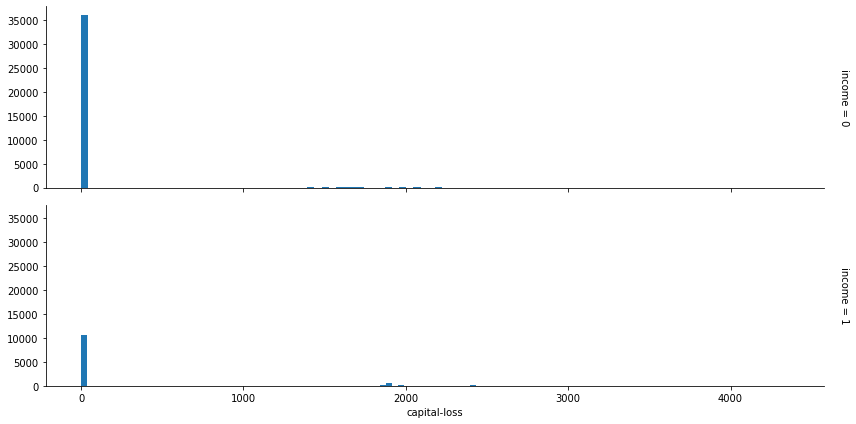

In [446]:
g = sns.FacetGrid(dataset, row="income", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'capital-loss',bins=100)
plt.show()

Not using that one

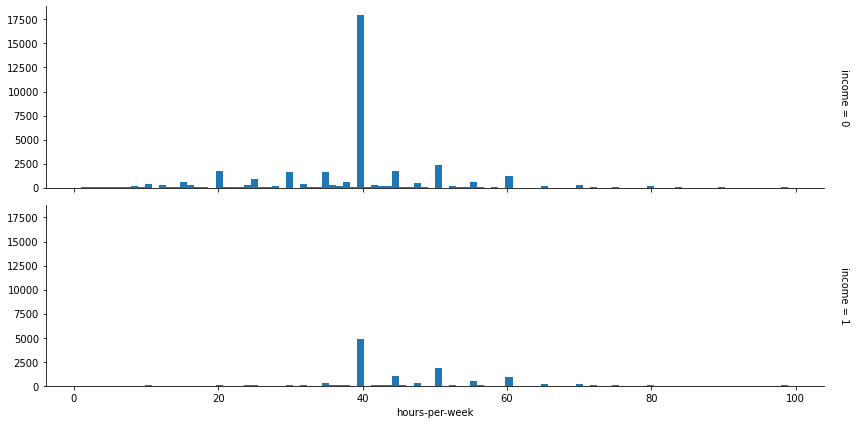

In [447]:
g = sns.FacetGrid(dataset, row="income", margin_titles=True, aspect=4, height=3)
g.map(plt.hist,'hours-per-week',bins=100)
plt.show()

# Preprocessing

In [448]:
# Replacing unique values (?) with null
dataset.replace("?", np.nan, inplace = True)
dataset.isna().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

In [449]:
dataset = dataset.dropna()
dataset.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [450]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education-num   45222 non-null  int64 
 5   marital-status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital-gain    45222 non-null  int64 
 11  capital-loss    45222 non-null  int64 
 12  hours-per-week  45222 non-null  int64 
 13  native-country  45222 non-null  object
 14  income          45222 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.5+ MB


In [451]:
dataset['workclass']=dataset['workclass'].map({'Private':1})
dataset['workclass'].fillna(0, inplace=True)

dataset['race']=dataset['race'].map({'White':1})
dataset['race'].fillna(0, inplace=True)

dataset['native-country']=dataset['native-country'].map({'United-States':1})
dataset['native-country'].fillna(0, inplace=True)

dataset.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th','HS-grad'], 'hs-or-under', inplace=True)
dataset.replace(['Prof-school','Assoc-acdm','Assoc-voc','Some-college'], 'acdm-edu', inplace=True)
dataset.replace(['Bachelors','Masters','Doctorate'], 'acdmgrad-or-above', inplace=True)

dataset['occupation'] = dataset['occupation'].map({
    'Exec-managerial':'level_3',
    'Prof-specialty':'level_3',
    'Armed-Forces':'level_3',
    'Protective-serv':'level_3',
    'Tech-support':'level_2',
    'Sales':'level_2',
    'Craft-repair':'level_2',
    'Transport-moving':'level_2',
    'Adm-clerical':'level_1',
    'Machine-op-inspct':'level_1',
    'Farming-fishing':'level_1',
    'Handlers-cleaners':'level_1',
    'Other-service':'level_1',
    'Priv-house-serv':'level_1'})

dataset.replace('Never-married', 0, inplace=True)
dataset.replace(['Divorced','Separated'], 1, inplace=True)
dataset.replace(['Married-civ-spouse','Married-AF-spouse'], 2, inplace=True)
dataset.replace(['Married-spouse-absent','Widowed'], 3, inplace=True)


C:\Users\lolor\AppData\Local\Temp\ipykernel_3292\486408011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['workclass']=dataset['workclass'].map({'Private':1})
c:\Users\lolor\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
C:\Users\lolor\AppData\Local\Temp\ipykernel_3292\486408011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [452]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,1.0,226802,hs-or-under,7,0,level_1,Own-child,0.0,Male,0,0,40,1.0,0
1,38,1.0,89814,hs-or-under,9,2,level_1,Husband,1.0,Male,0,0,50,1.0,0
2,28,0.0,336951,acdm-edu,12,2,level_3,Husband,1.0,Male,0,0,40,1.0,1
3,44,1.0,160323,acdm-edu,10,2,level_1,Husband,0.0,Male,7688,0,40,1.0,1
5,34,1.0,198693,hs-or-under,6,0,level_1,Not-in-family,1.0,Male,0,0,30,1.0,0


In [453]:
# Digitizing string features using label encoder
le=LabelEncoder()

dataset["sex"]=le.fit_transform(dataset["sex"])
dataset["education"]=le.fit_transform(dataset["education"])
dataset["occupation"]=le.fit_transform(dataset["occupation"])

C:\Users\lolor\AppData\Local\Temp\ipykernel_3292\3204526737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["sex"]=le.fit_transform(dataset["sex"])
C:\Users\lolor\AppData\Local\Temp\ipykernel_3292\3204526737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["education"]=le.fit_transform(dataset["education"])
C:\Users\lolor\AppData\Local\Temp\ipykernel_3292\3204526737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [454]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  int64  
 1   workclass       45222 non-null  float64
 2   fnlwgt          45222 non-null  int64  
 3   education       45222 non-null  int32  
 4   education-num   45222 non-null  int64  
 5   marital-status  45222 non-null  int64  
 6   occupation      45222 non-null  int32  
 7   relationship    45222 non-null  object 
 8   race            45222 non-null  float64
 9   sex             45222 non-null  int32  
 10  capital-gain    45222 non-null  int64  
 11  capital-loss    45222 non-null  int64  
 12  hours-per-week  45222 non-null  int64  
 13  native-country  45222 non-null  float64
 14  income          45222 non-null  int64  
dtypes: float64(3), int32(3), int64(8), object(1)
memory usage: 5.0+ MB


In [455]:
post_dataset = dataset.drop(['relationship'], axis=1)
x = post_dataset.drop(columns=['income'], axis=1)
y = post_dataset.iloc[:, -1]
y = y.values.tolist()
print("Features: \n", x.head())
print("Labels: \n", y[:5])

Features: 
    age  workclass  fnlwgt  education  education-num  marital-status  \
0   25        1.0  226802          2              7               0   
1   38        1.0   89814          2              9               2   
2   28        0.0  336951          0             12               2   
3   44        1.0  160323          0             10               2   
5   34        1.0  198693          2              6               0   

   occupation  race  sex  capital-gain  capital-loss  hours-per-week  \
0           0   0.0    1             0             0              40   
1           0   1.0    1             0             0              50   
2           2   1.0    1             0             0              40   
3           0   0.0    1          7688             0              40   
5           0   1.0    1             0             0              30   

   native-country  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
5             1.0  
Labels: 

In [456]:
post_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  int64  
 1   workclass       45222 non-null  float64
 2   fnlwgt          45222 non-null  int64  
 3   education       45222 non-null  int32  
 4   education-num   45222 non-null  int64  
 5   marital-status  45222 non-null  int64  
 6   occupation      45222 non-null  int32  
 7   race            45222 non-null  float64
 8   sex             45222 non-null  int32  
 9   capital-gain    45222 non-null  int64  
 10  capital-loss    45222 non-null  int64  
 11  hours-per-week  45222 non-null  int64  
 12  native-country  45222 non-null  float64
 13  income          45222 non-null  int64  
dtypes: float64(3), int32(3), int64(8)
memory usage: 4.7 MB


# Feature selection

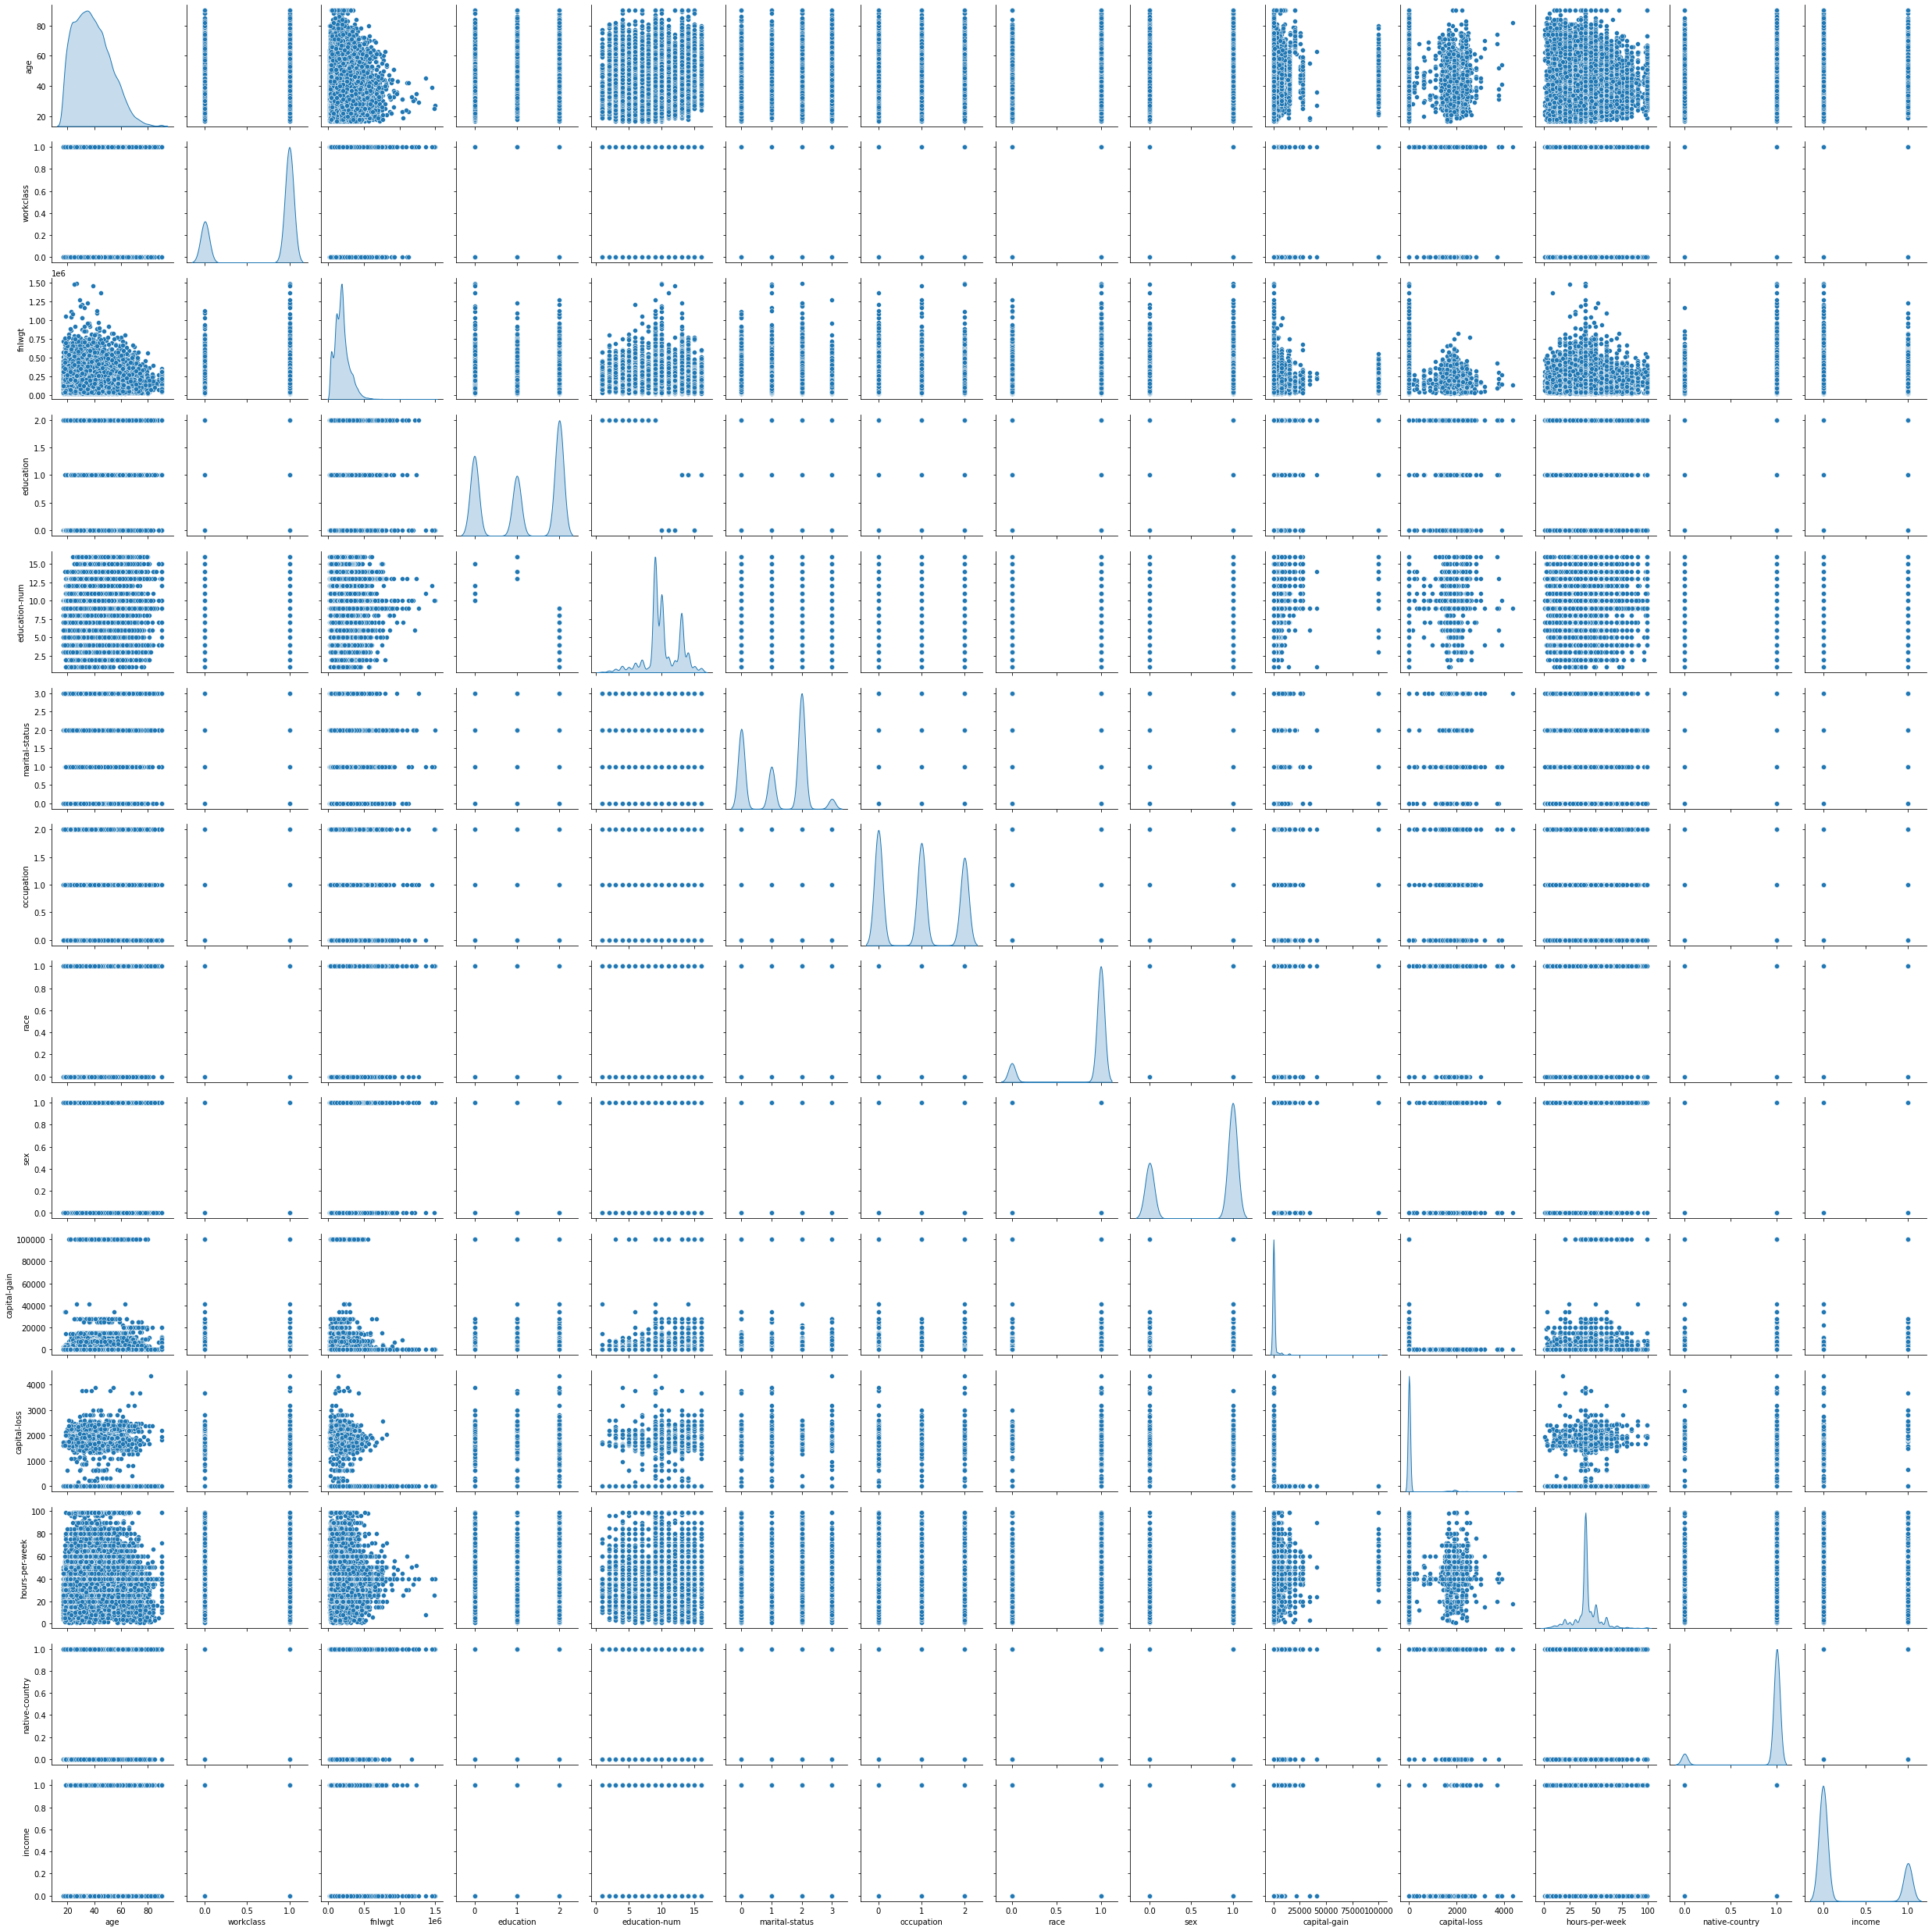

In [457]:
# Plotting Correlation between features
sns.pairplot(data = post_dataset, diag_kind='kde')
plt.show()

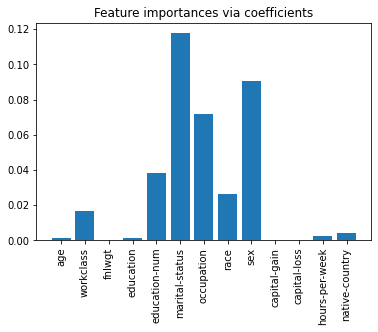

In [458]:
#Calculating feature importance
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(x.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation = 90)
plt.show()

In [459]:
post_dataset = dataset.drop(['relationship'], axis=1)
x = post_dataset.drop(columns=['income'], axis=1)
print("Features: \n", x.head())

Features: 
    age  workclass  fnlwgt  education  education-num  marital-status  \
0   25        1.0  226802          2              7               0   
1   38        1.0   89814          2              9               2   
2   28        0.0  336951          0             12               2   
3   44        1.0  160323          0             10               2   
5   34        1.0  198693          2              6               0   

   occupation  race  sex  capital-gain  capital-loss  hours-per-week  \
0           0   0.0    1             0             0              40   
1           0   1.0    1             0             0              50   
2           2   1.0    1             0             0              40   
3           0   0.0    1          7688             0              40   
5           0   1.0    1             0             0              30   

   native-country  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
5             1.0  


Feature age: 0.001574190772805295
Feature workclass: 0.016658442190623957
Feature fnlwgt: 5.954789230599999e-07
Feature education: 0.001422837517281783
Feature education-num: 0.03839825506636074
Feature marital-status: 0.1176006728290328
Feature occupation: 0.0719094519111575
Feature race: 0.026470190893725723
Feature sex: 0.09081818245803897
Feature capital-gain: 8.58521343616303e-06
Feature capital-loss: 0.000101883497251265
Feature hours-per-week: 0.00269393557743669
Feature native-country: 0.004431458863698577


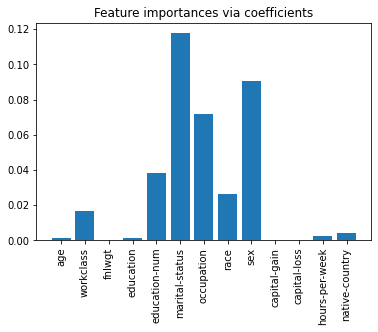

In [460]:
#Calculating feature importance
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(x, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(x.columns)

# Print the coeff of each feature
for i, score in enumerate(importance):
    print(f'Feature {feature_names[i]}: {score}')

plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation = 90)
plt.show()

In [461]:
#Feature selection using sequential feature selection
sfs_forward = SequentialFeatureSelector(ridge, n_features_to_select=8, direction="forward").fit(x, y)
print("Features selected by forward sequential selection: ", feature_names[sfs_forward.get_support()])

Features selected by forward sequential selection:  ['age' 'education-num' 'marital-status' 'occupation' 'sex' 'capital-gain'
 'capital-loss' 'hours-per-week']


Feature age: 11516.117267919391
Feature workclass: 162.32780744273498
Feature fnlwgt: 140341.05812812754
Feature education: 546.0293155796513
Feature education-num: 3225.917595711281
Feature marital-status: 4364.830496261628
Feature occupation: 3621.958577098292
Feature race: 44.037357865979835
Feature sex: 684.090092246607
Feature capital-gain: 113023152.84776407
Feature capital-loss: 1850506.8977679324
Feature hours-per-week: 8221.149029880897
Feature native-country: 5.9509198905071266
Features selected by chi sqaure:  ['age' 'fnlwgt' 'education-num' 'marital-status' 'occupation'
 'capital-gain' 'capital-loss' 'hours-per-week']


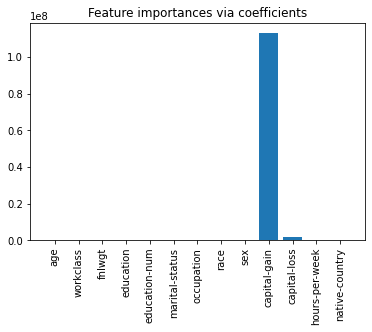

In [462]:
# Select 8 best features
selector = SelectKBest(score_func=chi2, k=8)

# Fit the selector to the training data
selector.fit(x, y)

# Get the selected features
selected_features = selector.transform(x)
feature_names = np.array(x.columns)

# Print the scores of each feature
for i, score in enumerate(selector.scores_):
    print(f'Feature {feature_names[i]}: {score}')


print("Features selected by chi sqaure: ", selector.get_feature_names_out())
plt.bar(height=selector.scores_, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation = 90)
plt.show()


In [463]:
# Using features selected by Sequential feature selection
x_sfs = post_dataset[feature_names[sfs_forward.get_support()]]
# Using features selected by Chi squared
x_chi = post_dataset[selector.get_feature_names_out()]

In [464]:
#Spliting data
x_train, x_test, y_train, y_test = train_test_split(x_sfs, y, shuffle=True, test_size=0.33, random_state=42)
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_chi, y, shuffle=True, test_size=0.33, random_state=42)

In [465]:
print("Train sample of Sequential feature selection:\n",x_train.head())
print("Train sample of Chi squared selection:\n",x_train1.head())

Train sample of Sequential feature selection:
        age  education-num  marital-status  occupation  sex  capital-gain  \
5794    40              4               2           0    1             0   
36413   48              9               2           1    1             0   
27772   30              9               2           0    1             0   
10865   76             10               2           0    0             0   
33053   39             10               0           1    0             0   

       capital-loss  hours-per-week  
5794           2057              40  
36413             0              40  
27772             0              66  
10865             0              12  
33053             0              40  
Train sample of Chi squared selection:
        age  fnlwgt  education-num  marital-status  occupation  capital-gain  \
5794    40  477345              4               2           0             0   
36413   48  215389              9               2           1         

# implementing RandomForest classifier 

In [466]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(min_samples_leaf=10, n_estimators=150, n_jobs=None)
rf1=RandomForestClassifier(min_samples_leaf=10, n_estimators=150, n_jobs=None)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

rf1.fit(x_train1, y_train1)
y_pred1 = rf1.predict(x_test1)
temp = {'sfs': [round(rf.score(x_train, y_train)*100,3), round(accuracy_score(y_test, y_pred)*100,3),
             round(precision_score(y_test, y_pred, average='micro')*100,3), round(recall_score(y_test, y_pred, average='micro')*100,3),round(f1_score(y_test, y_pred, average='micro')*100,3)]
                    ,'chi2':[round(rf1.score(x_train1, y_train1)*100,3), round(accuracy_score(y_test1, y_pred1)*100,3),
             round(precision_score(y_test1, y_pred1, average='micro')*100,3), round(recall_score(y_test1, y_pred1, average='micro')*100,3),round(f1_score(y_test1, y_pred1, average='micro')*100,3)]}
results = pd.DataFrame(data = temp, index=["Train-score", "Accuracy-score", "Precision-score", "Recall-score", "F1-score"])

print(results)


                    sfs    chi2
Train-score      86.521  86.996
Accuracy-score   86.016  85.996
Precision-score  86.016  85.996
Recall-score     86.016  85.996
F1-score         86.016  85.996


Confusion Matrix (SFS): 
 [[10638   594]
 [ 1493  2199]]
Confusion Matrix (Chi2): 
 [[10656   576]
 [ 1514  2178]]


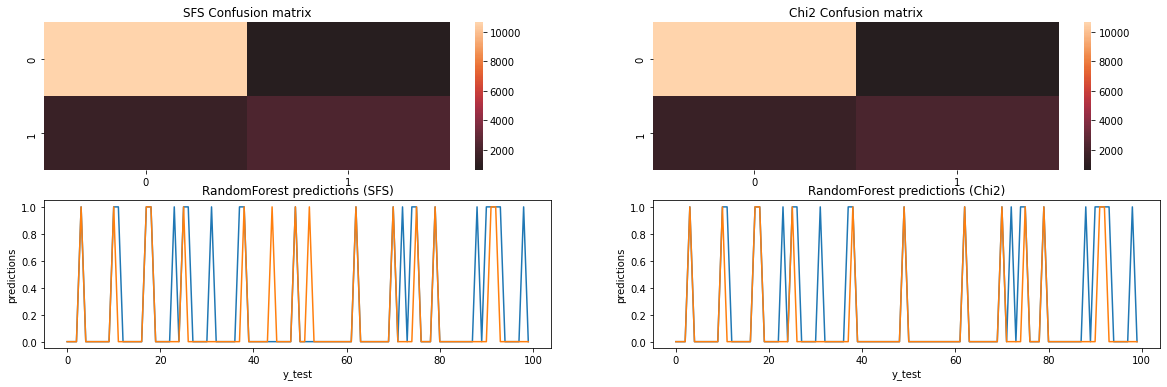

In [467]:

#Calculating (print) Confusion Matrix
print('Confusion Matrix (SFS): \n', confusion_matrix(y_test, y_pred))
print('Confusion Matrix (Chi2): \n', confusion_matrix(y_test1, y_pred1))
# Drawing confusion matrix
fig = plt.figure(figsize=(20,6))
fig.add_subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), center = True)
plt.title("SFS Confusion matrix")

fig.add_subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test1, y_pred1), center = True)
plt.title("Chi2 Confusion matrix")

# Plotting predictions vs actual value
fig.add_subplot(2,2,3)
plt.plot(y_test[200:300])
plt.plot(y_pred[200:300])
plt.title("RandomForest predictions (SFS)")
plt.xlabel('y_test')
plt.ylabel('predictions')

fig.add_subplot(2,2,4)
plt.plot(y_test1[200:300])
plt.plot(y_pred1[200:300])
plt.title("RandomForest predictions (Chi2)")
plt.xlabel('y_test')
plt.ylabel('predictions');

# implementing GradientBoosting classifier

In [468]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, criterion='squared_error', min_samples_split=100, min_samples_leaf=1, max_depth=3, max_features='log2')
gbc1=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, criterion='squared_error', min_samples_split=100, min_samples_leaf=1, max_depth=3, max_features='log2')
gbc.fit(x_train,y_train)
gbc1.fit(x_train1,y_train1)
y_pred=gbc.predict(x_test)
y_pred1 =gbc1.predict(x_test1)

temp = {'sfs': [round(gbc.score(x_train, y_train)*100,3), round(accuracy_score(y_test, y_pred)*100,3),
             round(precision_score(y_test, y_pred, average='micro')*100,3), round(recall_score(y_test, y_pred, average='micro')*100,3),round(f1_score(y_test, y_pred, average='micro')*100,3)]
                    ,'chi2':[round(gbc1.score(x_train1, y_train1)*100,3), round(accuracy_score(y_test1, y_pred1)*100,3),
             round(precision_score(y_test1, y_pred1, average='micro')*100,3), round(recall_score(y_test1, y_pred1, average='micro')*100,3),round(f1_score(y_test1, y_pred1, average='micro')*100,3)]}
results = pd.DataFrame(data = temp, index=["Train-score", "Accuracy-score", "Precision-score", "Recall-score", "F1-score"])

print(results)

                    sfs    chi2
Train-score      85.953  86.042
Accuracy-score   86.110  86.257
Precision-score  86.110  86.257
Recall-score     86.110  86.257
F1-score         86.110  86.257


Confusion Matrix (SFS): 
 [[10600   632]
 [ 1441  2251]]
Confusion Matrix (Chi2): 
 [[10601   631]
 [ 1420  2272]]


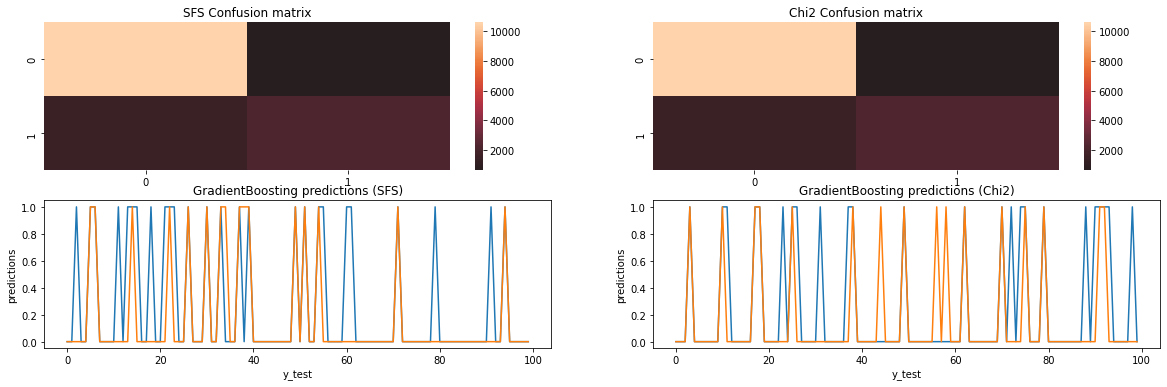

In [469]:
#Calculating (print) Confusion Matrix
print('Confusion Matrix (SFS): \n', confusion_matrix(y_test, y_pred))
print('Confusion Matrix (Chi2): \n', confusion_matrix(y_test1, y_pred1))
# Drawing confusion matrix
fig = plt.figure(figsize=(20,6))
fig.add_subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), center = True)
plt.title("SFS Confusion matrix")

fig.add_subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test1, y_pred1), center = True)
plt.title("Chi2 Confusion matrix")

# Plotting predictions vs actual value
fig.add_subplot(2,2,3)
plt.plot(y_test[:100])
plt.plot(y_pred[:100])
plt.title("GradientBoosting predictions (SFS)")
plt.xlabel('y_test')
plt.ylabel('predictions')

fig.add_subplot(2,2,4)
plt.plot(y_test1[200:300])
plt.plot(y_pred1[200:300])
plt.title("GradientBoosting predictions (Chi2)")
plt.xlabel('y_test')
plt.ylabel('predictions');

# implementing AdaBoost classifier

In [470]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100, learning_rate=1.0, algorithm='SAMME.R')
ada1=AdaBoostClassifier(n_estimators=100, learning_rate=1.0, algorithm='SAMME.R')
ada.fit(x_train,y_train)
ada1.fit(x_train1,y_train1)
y_pred=ada.predict(x_test)
y_pred1 =ada1.predict(x_test1)

temp = {'sfs': [round(ada.score(x_train, y_train)*100,3), round(accuracy_score(y_test, y_pred)*100,3),
             round(precision_score(y_test, y_pred, average='micro')*100,3), round(recall_score(y_test, y_pred, average='micro')*100,3),round(f1_score(y_test, y_pred, average='micro')*100,3)]
                    ,'chi2':[round(ada1.score(x_train1, y_train1)*100,3), round(accuracy_score(y_test1, y_pred1)*100,3),
             round(precision_score(y_test1, y_pred1, average='micro')*100,3), round(recall_score(y_test1, y_pred1, average='micro')*100,3),round(f1_score(y_test1, y_pred1, average='micro')*100,3)]}
results = pd.DataFrame(data = temp, index=["Train-score", "Accuracy-score", "Precision-score", "Recall-score", "F1-score"])

print(results)

                    sfs    chi2
Train-score      85.979  86.029
Accuracy-score   86.083  86.116
Precision-score  86.083  86.116
Recall-score     86.083  86.116
F1-score         86.083  86.116


Confusion Matrix (SFS): 
 [[10553   679]
 [ 1398  2294]]
Confusion Matrix (Chi2): 
 [[10588   644]
 [ 1428  2264]]


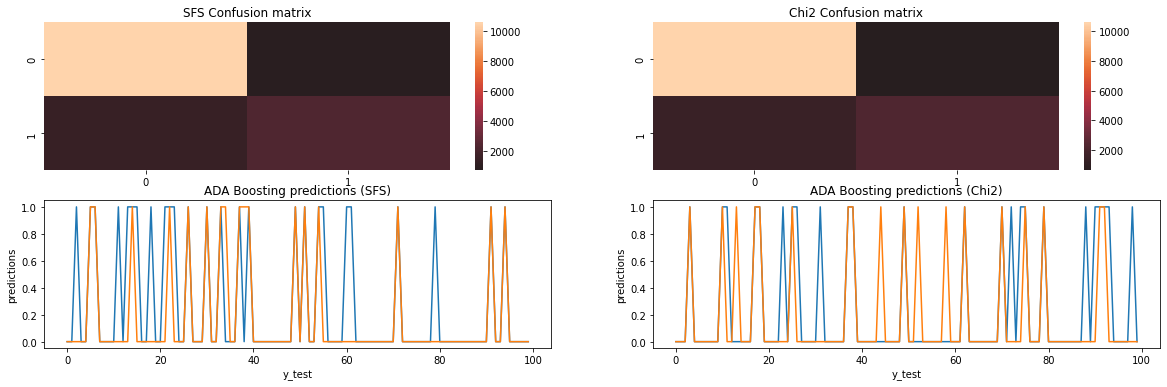

In [471]:
#Calculating (print) Confusion Matrix
print('Confusion Matrix (SFS): \n', confusion_matrix(y_test, y_pred))
print('Confusion Matrix (Chi2): \n', confusion_matrix(y_test1, y_pred1))
# Drawing confusion matrix
fig = plt.figure(figsize=(20,6))
fig.add_subplot(2,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), center = True)
plt.title("SFS Confusion matrix")

fig.add_subplot(2,2,2)
sns.heatmap(confusion_matrix(y_test1, y_pred1), center = True)
plt.title("Chi2 Confusion matrix")

# Plotting predictions vs actual value
fig.add_subplot(2,2,3)
plt.plot(y_test[:100])
plt.plot(y_pred[:100])
plt.title("ADA Boosting predictions (SFS)")
plt.xlabel('y_test')
plt.ylabel('predictions')

fig.add_subplot(2,2,4)
plt.plot(y_test1[200:300])
plt.plot(y_pred1[200:300])
plt.title("ADA Boosting predictions (Chi2)")
plt.xlabel('y_test')
plt.ylabel('predictions');